# Sentiment Analysis through VADER, TextBlob & Machine Learning Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"<folder>\Tweets.csv")
print(data.shape)
data.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data.shape

(14640, 15)

In [4]:
# !pip install nltk
# !pip install wordcloud
# !pip install scikit-learn
# !pip install autocorrect
# !pip install textblob
# !pip install xgboost

In [5]:
# !pip install nltk
# !pip install wordcloud
# !pip install scikit-learn
# !pip install autocorrect
# !pip install textblob




import nltk
from wordcloud import WordCloud
from string import punctuation
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.tokenize import TweetTokenizer
from autocorrect import Speller
tweet_tok=  TweetTokenizer()
spell=Speller(lang='en')
stop_nltk= stopwords.words("english")
stop_updated= stop_nltk+['user']+['https://t.co.']+[' http://t.co/']+['...'] +['http co']
lemm = WordNetLemmatizer()

def clean_text(text):
    tokens= tweet_tok.tokenize(text.lower())
    stemmed=[lemm.lemmatize(term) for term in tokens if term not in  stop_updated and term not in list(punctuation) and len(term)>2]
    stemmed_tok = [word for word in stemmed if word.isalpha()]
    stemmed_tokens = [spell(word) for word in stemmed_tok]
    res=' '.join(stemmed_tokens)
    return res

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elakk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elakk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elakk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
data['Clean_Tweets']= data['text'].apply(clean_text)

In [8]:
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('#','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('@','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('http','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('co','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('_ùª _ùª ','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('â_ù â_ù','')

### Sentiment Analysis using VADER Lexicon

In [9]:
# !pip install textblob
# !pip install xgboost

nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser= SentimentIntensityAnalyzer() 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\elakk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [11]:
data['sent_vader']= data['Clean_Tweets'].apply(get_vader_sentiment)

In [12]:
sent_pred=[]
for i in range(len(data['sent_vader'])):
    if data['sent_vader'][i]>=0.05:
        sent_pred.append('positive')
    elif data['sent_vader'][i]<=-0.05:
        sent_pred.append('negative')
    else:
        sent_pred.append('neutral')  

In [13]:
data['sent_pred_vader']= sent_pred

In [14]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Clean_Tweets,sent_vader,sent_pred_vader
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said,0.0000,neutral
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added mmercial experience tack,0.0000,neutral
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip,0.0000,neutral
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,-0.3306,negative
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing,-0.5829,negative


In [15]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()  #Creating a label-encoder obj
data['flagged_sentiment']= x1.fit_transform(data['airline_sentiment'])
data['predicted_sentiment_vader']= x1.fit_transform(data['sent_pred_vader']) 
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Clean_Tweets,sent_vader,sent_pred_vader,flagged_sentiment,predicted_sentiment_vader
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said,0.0000,neutral,1,1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added mmercial experience tack,0.0000,neutral,2,1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip,0.0000,neutral,1,1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,-0.3306,negative,0,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing,-0.5829,negative,0,0


In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
vader_accuracy = accuracy_score(data['flagged_sentiment'],data['predicted_sentiment_vader'])

In [17]:
vader_confusion_matrix = confusion_matrix(data['flagged_sentiment'],data['predicted_sentiment_vader'])

In [18]:
print("VADER Accuracy:", vader_accuracy)
print("VADER Confusion Matrix:\n", vader_confusion_matrix)

VADER Accuracy: 0.4933743169398907
VADER Confusion Matrix:
 [[3834 2210 3134]
 [ 380 1375 1344]
 [  83  266 2014]]


#### Accuracy of VADER lexicon is 49.33% 

### Sentiment Analysis with TextBlob

In [19]:
from textblob import TextBlob
def get_textblob_sentiment(sent):
    return TextBlob(sent).sentiment.polarity


In [20]:
data['sent_TextBlob']= data['Clean_Tweets'].apply(get_textblob_sentiment)

In [21]:
sent_pred=[]
for i in range(len(data['sent_TextBlob'])):
    if data['sent_TextBlob'][i]>=0.05:
        sent_pred.append('positive')
    elif data['sent_TextBlob'][i]<=-0.05:
        sent_pred.append('negative')
    else:
        sent_pred.append('neutral')  

In [22]:
data['sent_pred_textblob']= sent_pred

In [23]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()  #Creating a label-encoder obj
data['flagged_sentiment']= x1.fit_transform(data['airline_sentiment'])
data['predicted_sentiment_textblob']= x1.fit_transform(data['sent_pred_textblob']) 
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_location,user_timezone,Clean_Tweets,sent_vader,sent_pred_vader,flagged_sentiment,predicted_sentiment_vader,sent_TextBlob,sent_pred_textblob,predicted_sentiment_textblob
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,Eastern Time (US & Canada),said,0.0000,neutral,1,1,0.00000,neutral,1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),plus added mmercial experience tack,0.0000,neutral,2,1,0.00000,neutral,1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,Lets Play,Central Time (US & Canada),today must mean need take another trip,0.0000,neutral,1,1,-0.31250,negative,0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,-0.3306,negative,0,0,0.00625,neutral,1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),really big bad thing,-0.5829,negative,0,0,-0.35000,negative,0


In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
textblob_accuracy = accuracy_score(data['flagged_sentiment'],data['predicted_sentiment_textblob'])

In [25]:
textblob_confusion_matrix = confusion_matrix(data['flagged_sentiment'],data['predicted_sentiment_textblob'])

In [26]:
print("TextBlob Accuracy:", textblob_accuracy)
print("TextBlob Confusion Matrix:\n", textblob_confusion_matrix)

TextBlob Accuracy: 0.42978142076502734
TextBlob Confusion Matrix:
 [[2669 4040 2469]
 [ 245 1919  935]
 [  84  575 1704]]


#### Accuracy using TextBlob is 42.97%

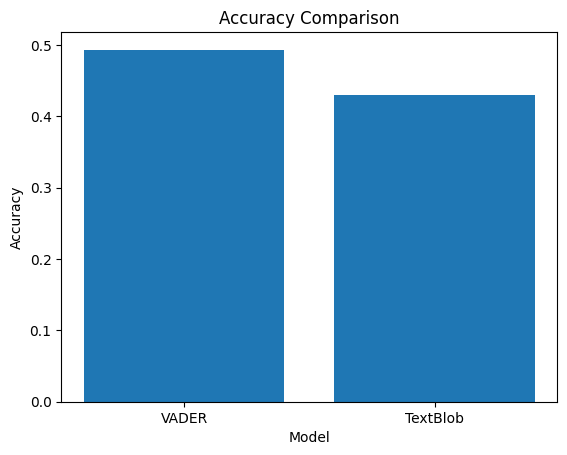

In [27]:
import matplotlib.pyplot as plt

# Plotting accuracy scores
plt.bar(['VADER', 'TextBlob'], [vader_accuracy, textblob_accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

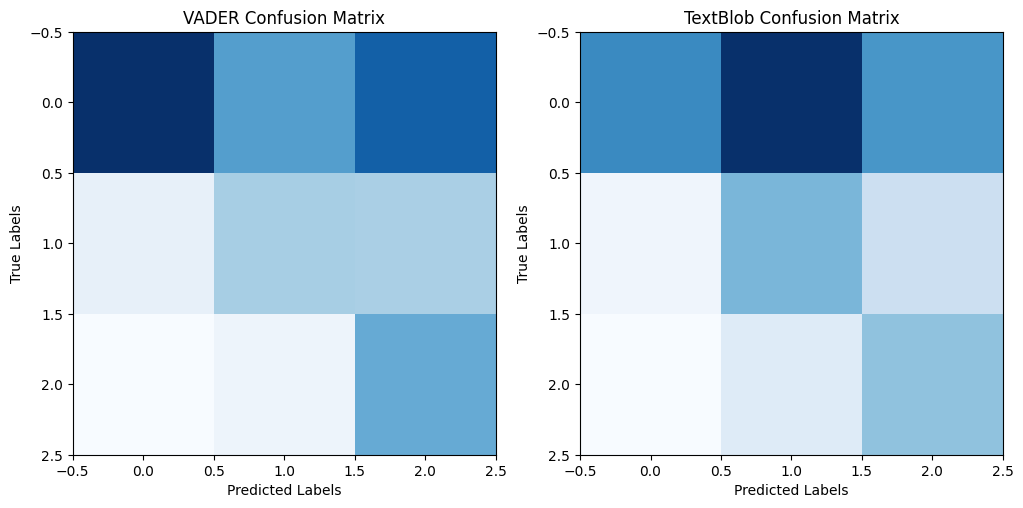

In [28]:
# Plotting confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(vader_confusion_matrix, cmap='Blues')
axs[0].set_title('VADER Confusion Matrix')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

axs[1].imshow(textblob_confusion_matrix, cmap='Blues')
axs[1].set_title('TextBlob Confusion Matrix')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

plt.show()

### Sentiment Analysis with using Models

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [30]:
X= data['Clean_Tweets'].values
y= data['flagged_sentiment'].values

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
count_vect= CountVectorizer()
x_train_bow= count_vect.fit_transform(X_train)

In [33]:
x_test_bow= count_vect.transform(X_test)

In [34]:
print(x_train_bow.shape,x_test_bow.shape)

(10248, 6508) (4392, 6508)


### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

LogReg= LogisticRegression()
LogReg= LogReg.fit(x_train_bow,y_train)

y_pred= LogReg.predict(x_test_bow)

In [36]:
LRA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ", LRA)
cm_lg= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm_lg,sep='\n')

Accuracy Score:  0.782103825136612
Confusion Matrix: 
[[2482  239   93]
 [ 331  487   66]
 [ 135   93  466]]


In [37]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
LogReg= multiclass_roc_auc_score(y_test,y_pred)
LogReg

np.float64(0.778574273707903)

### Naive Bayes Classification

In [39]:
from sklearn.naive_bayes import  MultinomialNB

mnb= MultinomialNB()
mnb=mnb.fit(x_train_bow.toarray(),y_train)

y_pred= mnb.predict(x_test_bow.toarray())

In [40]:
NBA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",NBA)
cm_nb= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm_nb,sep='\n')

Accuracy Score:  0.7670765027322405
Confusion Matrix: 
[[2616  132   66]
 [ 493  328   63]
 [ 202   67  425]]


In [41]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
NB= multiclass_roc_auc_score(y_test,y_pred)
NB

np.float64(0.7301713425454075)

### KNN

In [43]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_bow.toarray(),y_train)

y_pred= knn.predict(x_test_bow.toarray())

In [44]:
KNNA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",KNNA)
cm_kn= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm_kn,sep='\n')

Accuracy Score:  0.5514571948998178
Confusion Matrix: 
[[1452 1228  134]
 [ 210  614   60]
 [ 119  219  356]]


In [45]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
KNN= multiclass_roc_auc_score(y_test,y_pred)
KNN

np.float64(0.6750152680782923)

### Decision Tree

In [47]:
dtc= DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train_bow.toarray(),y_train)
y_pred= dtc.predict(x_test_bow.toarray())

In [48]:
DTA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",DTA)
cm_dt= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm_dt,sep='\n')

Accuracy Score:  0.6914845173041895
Confusion Matrix: 
[[2191  420  203]
 [ 327  439  118]
 [ 160  127  407]]


In [49]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
DT= multiclass_roc_auc_score(y_test,y_pred)
DT

np.float64(0.7183861908135478)

### Random Forest

In [51]:
rf= RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train_bow.toarray(),y_train)
y_pred= rf.predict(x_test_bow.toarray())

In [52]:
RFA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",RFA)
cm_rf= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm_rf,sep='\n')

Accuracy Score:  0.7641165755919854
Confusion Matrix: 
[[2473  245   96]
 [ 347  443   94]
 [ 175   79  440]]


In [53]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
RF= multiclass_roc_auc_score(y_test,y_pred)
RF

np.float64(0.7565698746650216)

### Ada Boost Classifier

In [55]:
ada= AdaBoostClassifier(n_estimators=100,random_state=0)
ada.fit(x_train_bow.toarray(),y_train)
y_pred= ada.predict(x_test_bow.toarray())

c:\Users\elakk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [56]:
ADAA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",ADAA)
cm_ad= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm_ad,sep='\n')

Accuracy Score:  0.7285974499089253
Confusion Matrix: 
[[2285  422  107]
 [ 320  482   82]
 [ 157  104  433]]


In [57]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
AD= multiclass_roc_auc_score(y_test,y_pred)
AD

np.float64(0.7463077475267582)

### Gradient Boost Algorithm

In [ ]:
gradient= GradientBoostingClassifier(n_estimators=200,random_state=0,max_depth=2)
gradient.fit(x_train_bow.toarray(),y_train)
y_pred= gradient.predict(x_test_bow.toarray())

In [ ]:
GBA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",GBA)
cm_gb= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm_gb,sep='\n')

Accuracy Score:  0.7199453551912568
Confusion Matrix: 
[[2699   29   86]
 [ 737   83   64]
 [ 300   14  380]]


In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
GB= multiclass_roc_auc_score(y_test,y_pred)
GB

np.float64(0.6484322692916432)

### XG Boost Algorithm

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
Xg= GradientBoostingClassifier(n_estimators=200,random_state=0,max_depth=2)
Xg.fit(x_train_bow.toarray(),y_train)
y_pred= Xg.predict(x_test_bow.toarray())

In [ ]:
XGA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",XGA)
cm_xg= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm_xg,sep='\n')

Accuracy Score:  0.7199453551912568
Confusion Matrix: 
[[2699   29   86]
 [ 737   83   64]
 [ 300   14  380]]


In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
XG= multiclass_roc_auc_score(y_test,y_pred)
XG

np.float64(0.6484322692916432)

### Comparison Of ML Models

In [ ]:
Algorithms= ['Logistic Regression','Naive Bayes','KNN','Decision Tree','Random Forest','Ada Boost','Gradient Boost','XG Boost']
Accuracy= [LRA,NBA,KNNA,DTA,RFA,ADAA,GBA,XGA]
AUC_ROC= [LogReg,NB,KNN,DT,RF,AD,GB,XG]
comp= pd.DataFrame([Accuracy,AUC_ROC]).T
comp.set_index([Algorithms],inplace=True)
comp.columns=['Accuracy','AUC-ROC']
comp

,Accuracy,AUC-ROC
Logistic Regression,0.782104,0.778574
Naive Bayes,0.767077,0.730171
KNN,0.551457,0.675015
Decision Tree,0.695128,0.723261
Random Forest,0.764117,0.756570
Ada Boost,0.728597,0.746308
Gradient Boost,0.719945,0.648432
XG Boost,0.719945,0.648432


<Axes: title={'center': 'Model Comparison'}>

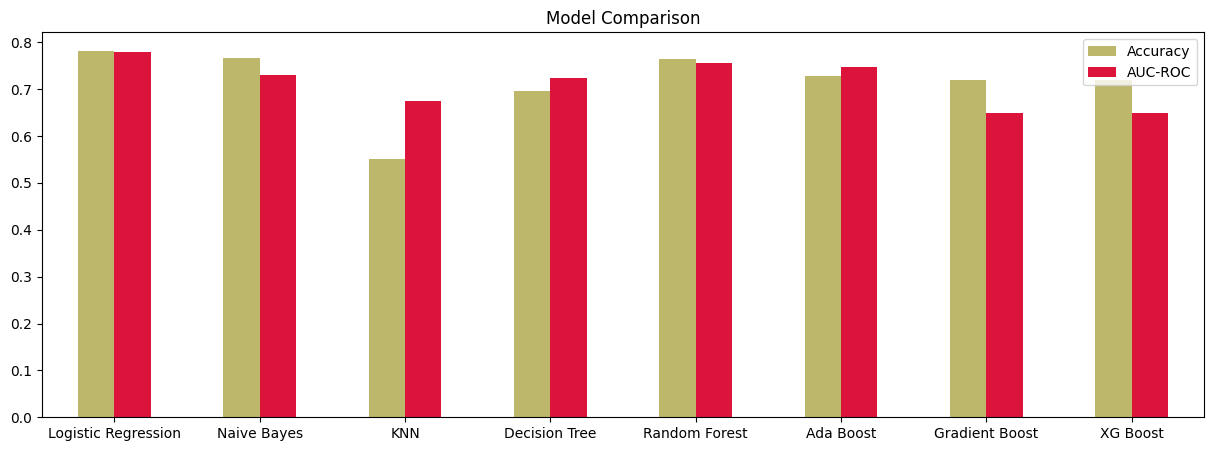

In [ ]:
comp.plot(kind='bar',figsize=(15,5),rot=0,title='Model Comparison',color=['darkkhaki','crimson'])

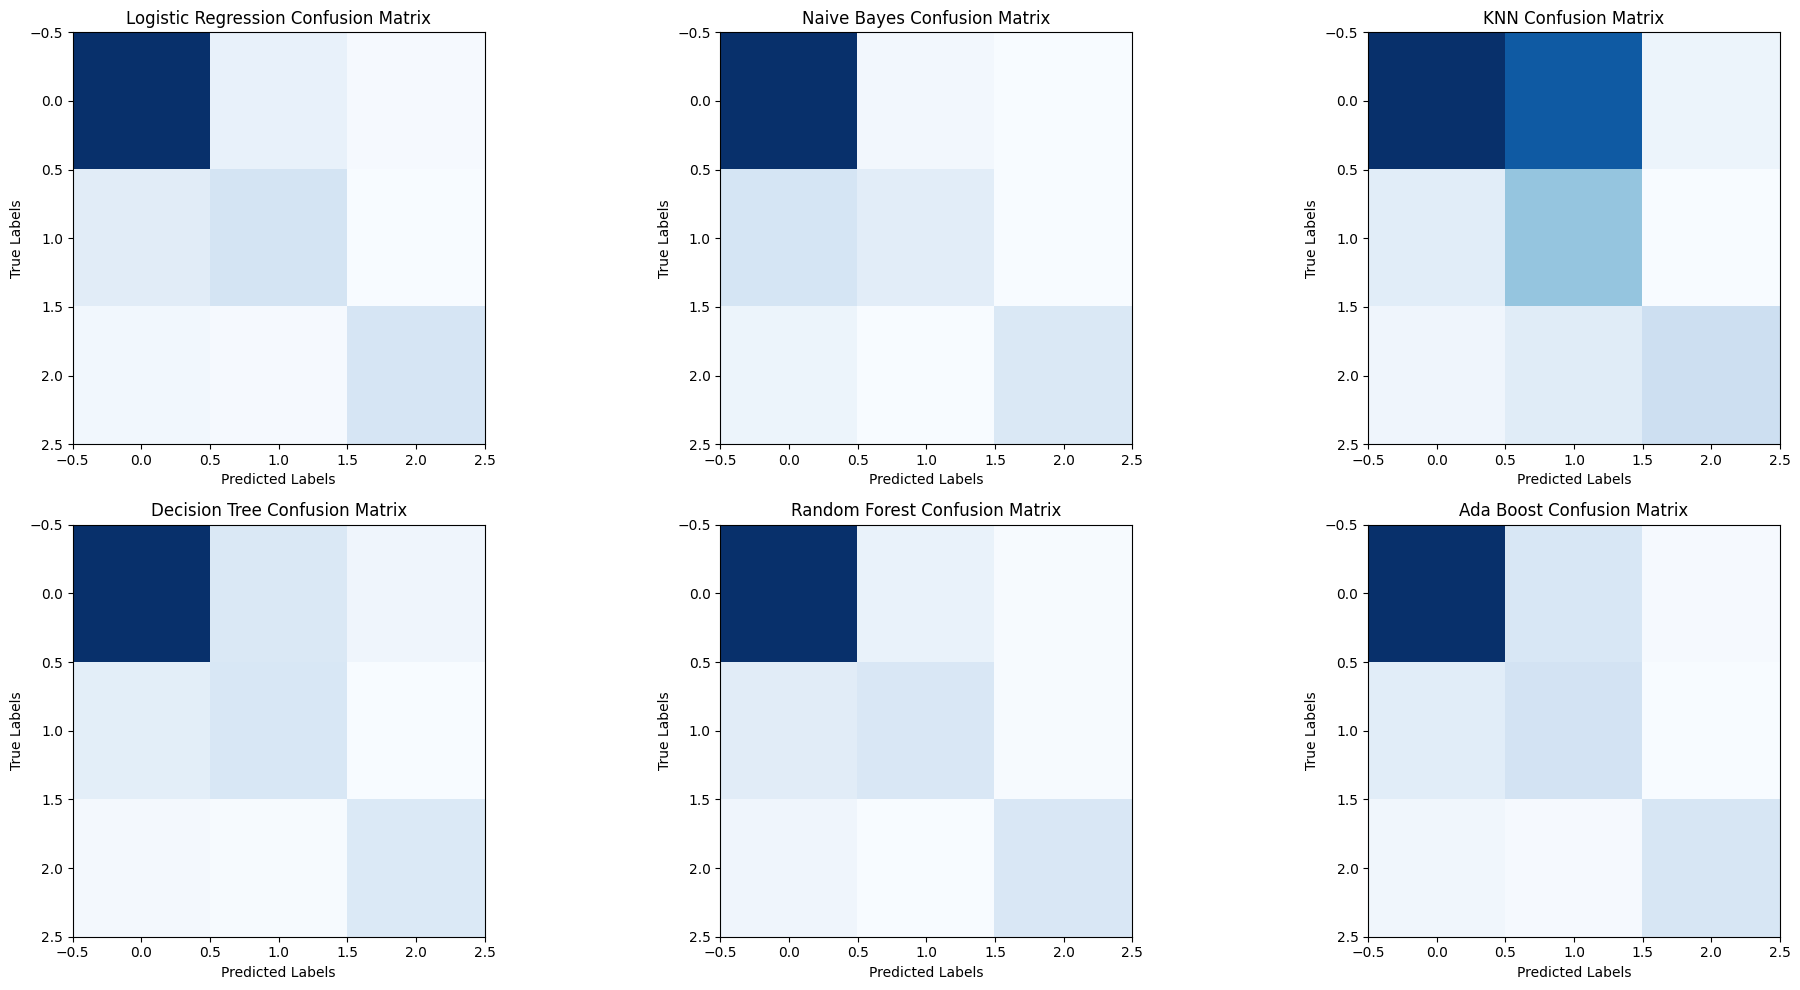

In [63]:
## Comparison of Confusion Matrices
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

models = ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest', 
          'Ada Boost']
confusion_matrices = [cm_lg, cm_nb, cm_kn, cm_dt, cm_rf, cm_ad]

for i, (model, cm) in enumerate(zip(models, confusion_matrices)):
    axs[i // 3, i % 3].imshow(cm, cmap='Blues')
    axs[i // 3, i % 3].set_title(model + ' Confusion Matrix')
    axs[i // 3, i % 3].set_xlabel('Predicted Labels')
    axs[i // 3, i % 3].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


In [ ]:

Algorithms= ['Logistic Regression','Naive Bayes','KNN','Decision Tree','Random Forest','Ada Boost','Gradient Boost','XG Boost']
Accuracy= []
AUC_ROC= []
F1_Score= []

# Logistic Regression
LogReg = LogisticRegression().fit(x_train_bow, y_train)
y_pred = LogReg.predict(x_test_bow)
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# Naive Bayes
mnb = MultinomialNB().fit(x_train_bow.toarray(), y_train)
y_pred = mnb.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# KNN
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train_bow.toarray(), y_train)
y_pred = knn.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# Decision Tree
dtc = DecisionTreeClassifier(criterion="entropy").fit(x_train_bow.toarray(), y_train)
y_pred = dtc.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(x_train_bow.toarray(), y_train)
y_pred = rf.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# Ada Boost
ada = AdaBoostClassifier(n_estimators=100, random_state=0).fit(x_train_bow.toarray(), y_train)
y_pred = ada.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# Gradient Boost
gradient = GradientBoostingClassifier(n_estimators=200, random_state=0, max_depth=2).fit(x_train_bow.toarray(), y_train)
y_pred = gradient.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# XG Boost
xgb_model = xgb.XGBClassifier().fit(x_train_bow.toarray(), y_train)
y_pred = xgb_model.predict(x_test_bow.toarray())
Accuracy.append(metrics.accuracy_score(y_pred, y_test))
AUC_ROC.append(multiclass_roc_auc_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred, average='macro'))

# DataFrame with Accuracy, AUC-ROC, and F1-Score
comp = pd.DataFrame({'Accuracy': Accuracy, 'AUC-ROC': AUC_ROC, 'F1-Score': F1_Score}, index=Algorithms)
comp


c:\Users\elakk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


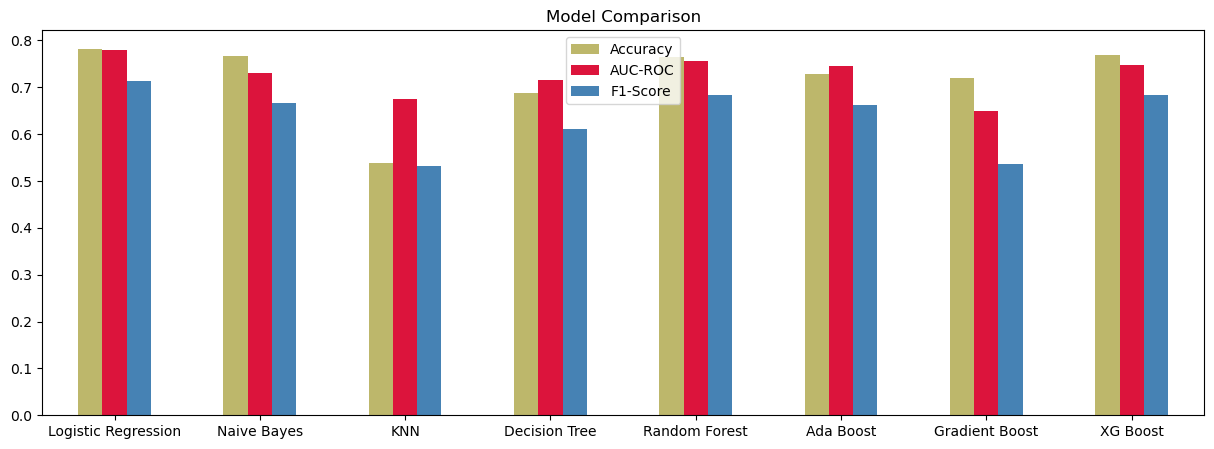

In [ ]:
comp.plot(kind='bar', figsize=(15,5), rot=0, title='Model Comparison', color=['darkkhaki', 'crimson', 'steelblue'])
plt.legend(["Accuracy", "AUC-ROC", "F1-Score"])
plt.show()
